<a href="https://colab.research.google.com/github/Dangtue-uit/CS114.K21/blob/master/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.4
matplotlib: 3.2.1
pandas: 1.0.3
sklearn: 0.22.2.post1


In [0]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
# Load dataset
dataset = read_csv("Dataset.csv")

In [44]:
# shape
print(dataset.shape)

(2201, 4)


In [45]:
# head
print(dataset.head(20))

   class    age  gender survived
0    1st  adult    male      yes
1    3rd  adult    male       no
2   crew  adult    male       no
3   crew  adult    male      yes
4    2nd  adult    male       no
5   crew  adult    male       no
6   crew  adult    male       no
7   crew  adult    male      yes
8    3rd  child    male       no
9   crew  adult    male      yes
10  crew  adult    male       no
11   2nd  adult    male       no
12  crew  adult    male       no
13   1st  adult    male      yes
14  crew  adult  female      yes
15  crew  adult    male       no
16  crew  adult    male       no
17  crew  adult    male       no
18   2nd  adult  female      yes
19   1st  adult  female      yes


In [46]:

# descriptions
print(dataset.describe())

       class    age gender survived
count   2201   2201   2201     2201
unique     4      2      2        2
top     crew  adult   male       no
freq     885   2092   1731     1490


In [47]:
# class distribution
print(dataset.groupby('class').size())


class
1st     325
2nd     285
3rd     706
crew    885
dtype: int64


In [0]:
#processing dataset
dataset = dataset.replace('male',1)
dataset = dataset.replace('female',0)
dataset = dataset.replace('1st',1)
dataset = dataset.replace('2nd',2)
dataset = dataset.replace('3rd',3)
dataset = dataset.replace('crew',4)
dataset = dataset.replace('adult',1)
dataset = dataset.replace('child',0)
dataset = dataset.replace('yes',1)
dataset = dataset.replace('no',0)

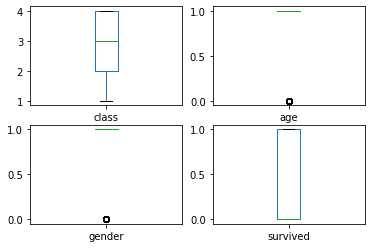

In [49]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

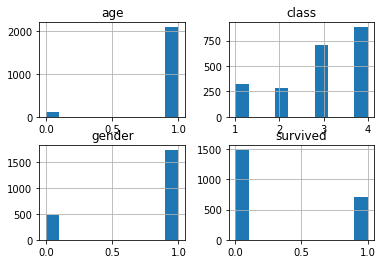

In [50]:
# histograms
dataset.hist()
pyplot.show()

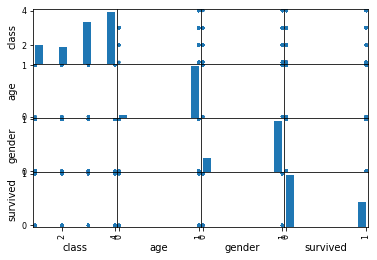

In [51]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [54]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.776705 (0.015467)
LDA: 0.776705 (0.015467)
KNN: 0.776136 (0.025435)
CART: 0.789773 (0.018323)
NB: 0.773864 (0.021531)
SVM: 0.781818 (0.012500)


In [0]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [56]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.782312925170068
[[269  20]
 [ 76  76]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       289
           1       0.79      0.50      0.61       152

    accuracy                           0.78       441
   macro avg       0.79      0.72      0.73       441
weighted avg       0.78      0.78      0.77       441

